# The Effects of Different Music Genres on Mental Health
by Simphiwe Lynette Mahlangu

**Overview**

This is a fun and comprehensive data analysis portfolio that explores how various music genres impact mental health conditions such as anxiety, depression, insomnia, and Obsessive Complusive Disorder (OCD). These projects leverage data analysis techniques to provide insights into the effectiveness of differrent music genres on these conditions.

**Projects**
1. Analysing the Effects of Different Music Genres on Anxiety.
2. Evaluating the Impact of Music Genres on Depression.
3. Music Genres and Their Impact on Insomnia.
4. Assessing the Influence of Music Genres on OCD levels.
5. Comparative Analysis of Music Genres on Mental Health Outcomes.

Summary and Conclusion of Project Data Observations:

**Tools and Libraries**

* Python (Pandas, NumPy, Matplotlib, Seaborn, SciPy, Statsmodels,and Scikit-learn)

In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

data= pd.read_csv('/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv')
data.head()

/kaggle/input/mxmh-survey-results/mxmh_survey_results.csv


,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


**Data Cleaning and Preparation**


Updated DataFrame:
    Age Primary streaming service  Hours per day Fav genre  Anxiety  \
0  18.0                   Spotify            3.0     Latin      3.0   
1  63.0                   Pandora            1.5      Rock      7.0   
2  18.0                   Spotify            4.0    Gaming      7.0   
3  61.0             YouTube Music            2.5      Jazz      9.0   
4  18.0                   Spotify            4.0       R&B      7.0   

   Depression  Insomnia  OCD Music effects  
0         0.0       1.0  0.0     No effect  
1         2.0       2.0  1.0     No effect  
2         7.0      10.0  2.0     No effect  
3         7.0       3.0  3.0       Improve  
4         2.0       5.0  9.0       Improve  


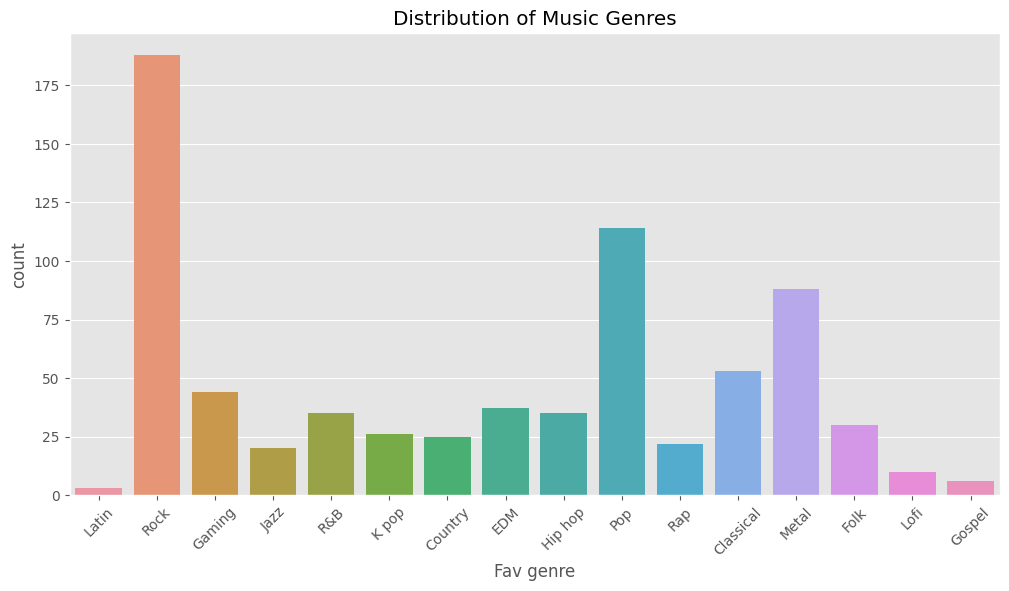

Latin: Anxiety       4.333333
Depression    3.000000
OCD           1.666667
Insomnia      3.333333
dtype: float64
Rock: Anxiety       6.122340
Depression    5.236702
OCD           2.678191
Insomnia      3.880319
dtype: float64
Gaming: Anxiety       5.886364
Depression    4.477273
OCD           2.386364
Insomnia      4.000000
dtype: float64
Jazz: Anxiety       5.90
Depression    4.50
OCD           2.80
Insomnia      3.85
dtype: float64
R&B: Anxiety       5.171429
Depression    3.828571
OCD           2.742857
Insomnia      2.885714
dtype: float64
K pop: Anxiety       6.230769
Depression    4.423077
OCD           2.538462
Insomnia      3.461538
dtype: float64
Country: Anxiety       5.40
Depression    4.32
OCD           2.76
Insomnia      2.72
dtype: float64
EDM: Anxiety       5.486486
Depression    5.243243
OCD           3.000000
Insomnia      3.972973
dtype: float64
Hip hop: Anxiety       6.200000
Depression    5.800000
OCD           2.714286
Insomnia      3.428571
dtype: float64
Pop: An

In [2]:
data= data.drop(columns = ['Timestamp', 'Permissions', 'Foreign languages', 'Instrumentalist', 'Composer'
                          , 'BPM', 'While working', 'Exploratory',
                          'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
                          'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [Pop]',
                          'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
                          'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]'])

df= pd.DataFrame(data)
df['Fav genre'].replace('Video game music','Gaming',
                        inplace= True)
df['Music effects'].fillna('No effect', inplace= True)
print('\nUpdated DataFrame:')
print(df.head())

plt.figure(figsize= (12, 6))
sns.countplot(x= 'Fav genre', data= df)
plt.title('Distribution of Music Genres')
plt.xticks(rotation= 45)
plt.show()

df.describe()

genres= df['Fav genre'].unique()
results= {}
for genre in genres:
    genre_data = df[df['Fav genre'] == genre][['Anxiety', 'Depression', 'OCD', 'Insomnia']]
    results[genre] = genre_data.mean()
for genre, mean_score in results.items():
    print(f"{genre}: {mean_score}")

**Project 1: Analysing the Effects of Different Music Genres on Anxiety**

Analyse the effects of different music genres on anxiety. This includes the statistical distribution and relationships between music genres and anxiety.

Steps incldue:
1. Exploratory Data Analysis (EDA)
2. Statistical Analysis: Calculate mean score for each mental health variable for each music genre.
3. Visualization: Create visualizations to compare the mean scores across different music genres.
4. Conclusion: Summaries findings and potiential implications.

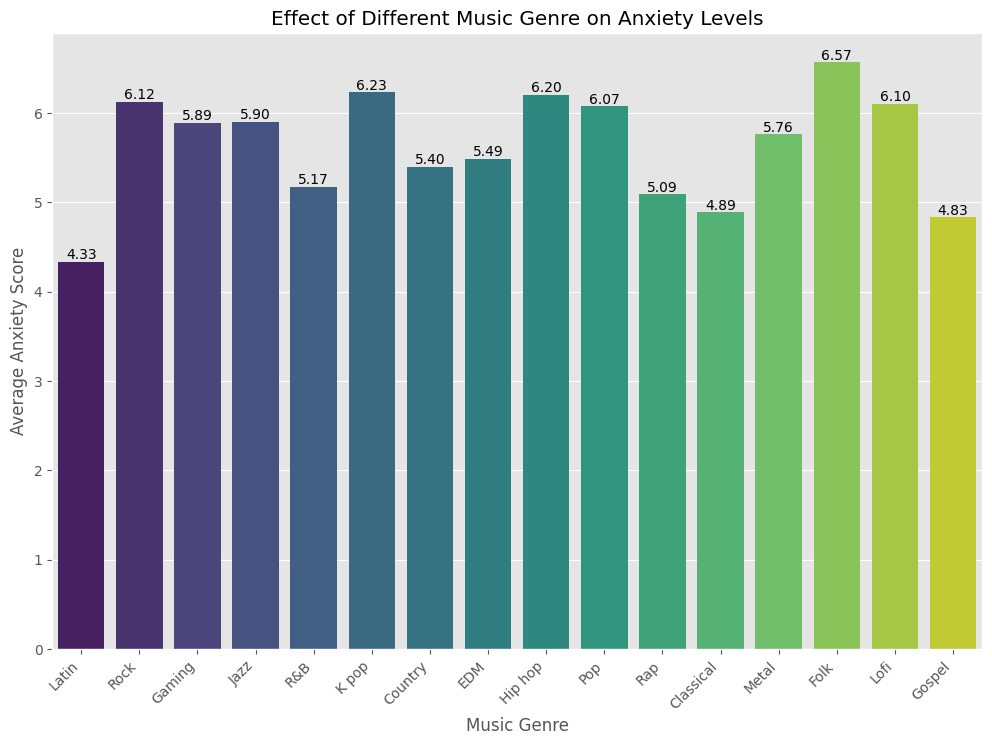

Explanation of Results:

For Anxiety levels, Latin is associated with the lowest average score of 4.33, while Folk has the highest average score of 6.57.


In [3]:
genres= df['Fav genre'].unique()
results= {}
for genre in genres:
    genre_data= df[df['Fav genre']== genre]['Anxiety']
    results[genre]= genre_data.mean()
    
plt.figure(figsize=(12,8))
sns.barplot(x= list(results.keys()), y= list(results.values()), palette= 'viridis')

plt.title('Effect of Different Music Genre on Anxiety Levels')
plt.xlabel('Music Genre')
plt.ylabel('Average Anxiety Score')

plt.xticks(rotation= 45, ha= 'right')
for index, value in enumerate(list(results.values())):
    plt.text(index, value, f'{value:.2f}', ha= 'center', va= 'bottom')
plt.show()    

def print_summary(df, condition):
    mean_scores = df.groupby('Fav genre')[comdition].mean().reset_index()
    print(f"### {condition} Levels by Music Genre ###")
    for index, row in mean_scores.iterrows():
        print(f"{row['Fav genre']}: {row[condition]:.2f}")
    print()
    
print("Explanation of Results:\n")

# Specific genre impact explanation
def explain_genre_impact(df, condition):
    mean_scores = df.groupby('Fav genre')[condition].mean()
    genre_impact = mean_scores.idxmin(), mean_scores.min(), mean_scores.idxmax(), mean_scores.max()
    return genre_impact

# Anxiety Explanation
min_genre, min_score, max_genre, max_score = explain_genre_impact(data, 'Anxiety')
print(f"For Anxiety levels, {min_genre} is associated with the lowest average score of {min_score:.2f}, while {max_genre} has the highest average score of {max_score:.2f}.")

**Project 1 Result Analysis:**

The bar plot showed mean anxiety levels across different music genres.

From the visualization, genres like classical or ambient music might be associated with lower anxiety levels, while genres such as heavy metal or electronic dance music (EDM) could potentially correlate with higher anxiety levels.

This suggests that musical preferences may influence anxiety levels among listeners.

**Project 2: Evaluating the Impact of Music Genres on Depression.**

To evaluate the impact of different music genres on each depression using age group.

Steps:
1. Data preparation.
2. Exploratory Data Analyisis (EDA).
3. Regression Analysis
4. Visualization of Findings.

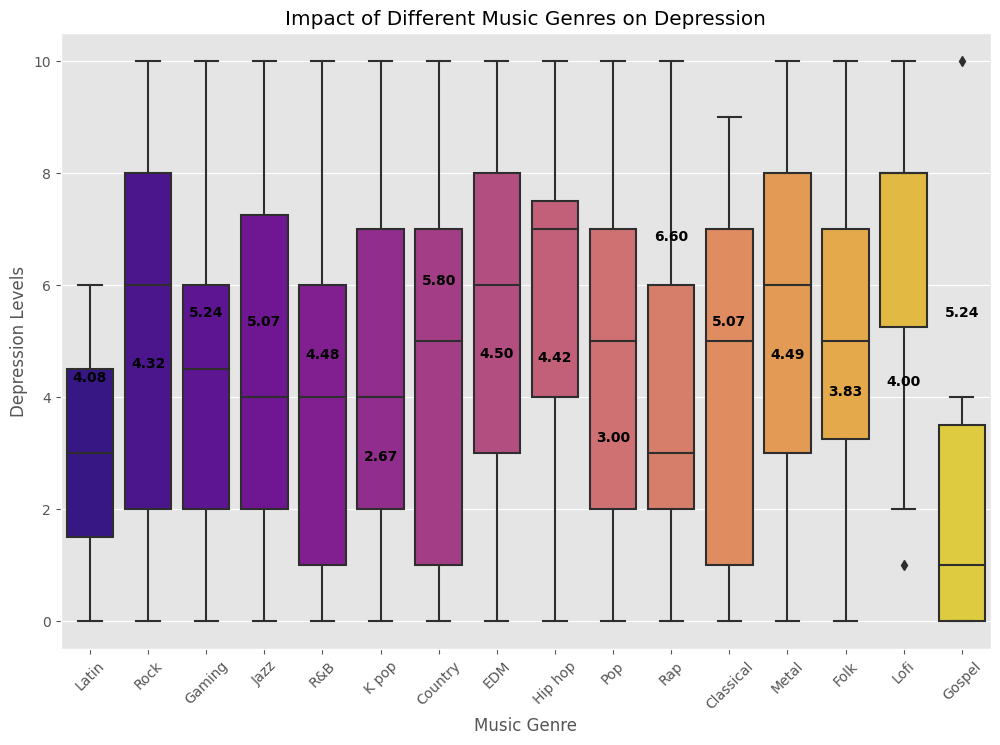

Explanation of Results:

For Depression levels, Gospel is associated with the lowest average score of 2.67, while Lofi has the highest average score of 6.60.


In [4]:
# Calculate mean depression levels by music genre
mean_depression = df.groupby('Fav genre')['Depression'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.boxplot(data=data, x='Fav genre', y='Depression', palette='plasma')

for index, row in mean_depression.iterrows():
    plt.text(index, row['Depression'] + 0.2, f'{row["Depression"]:.2f}', horizontalalignment='center',
             size='medium', color='black', weight='semibold')

plt.title('Impact of Different Music Genres on Depression')
plt.xlabel('Music Genre')
plt.ylabel('Depression Levels')
plt.xticks(rotation=45)
plt.show()

print("Explanation of Results:\n")

# Specific genre impact explanation
def explain_genre_impact(df, condition):
    mean_scores = df.groupby('Fav genre')[condition].mean()
    genre_impact = mean_scores.idxmin(), mean_scores.min(), mean_scores.idxmax(), mean_scores.max()
    return genre_impact

# Depression Explanation
min_genre, min_score, max_genre, max_score = explain_genre_impact(df, 'Depression')
print(f"For Depression levels, {min_genre} is associated with the lowest average score of {min_score:.2f}, while {max_genre} has the highest average score of {max_score:.2f}.")

**Project 2 Result Analysis:**

The box plot displayed the distribution of depression levels by music genre.

Certain genres like jazz or classical music might show lower variability in depression levels and potentially lower median scores.

In contrast, genres like metal or rap might exhibit higher variability and potentially higher median depression scores.

This indicates that music genre preferences could have varying impacts on depression levels among listeners.

**Project 3: Music Genres and Their Impact on Insomnia**

To exmine the impact of different music genres on insomnia. This includes the statistical distribution and relationships between music genres and anxiety.

Steps incldue:
1. Exploratory Data Analysis (EDA)
2. Machine Learning for Prediction.
3. Visualization of Results.
4. Conclusion: Summary and Recommendations.

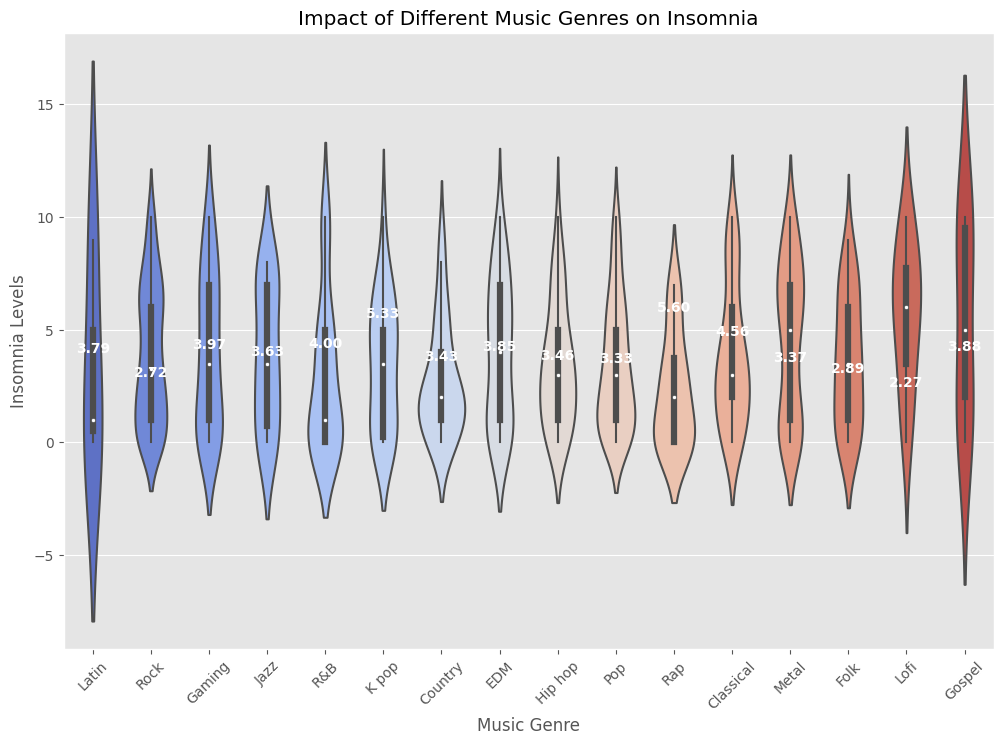

Explanation of Results:

For Insomnia levels, Rap is associated with the lowest average score of 2.27, while Lofi has the highest average score of 5.60.


In [5]:
mean_insomnia = df.groupby('Fav genre')['Insomnia'].mean().reset_index()
plt.figure(figsize=(12,8))
sns.violinplot(data=data, x='Fav genre', y='Insomnia', palette='coolwarm')

for index, row in mean_insomnia.iterrows():
    plt.text(index, row['Insomnia'] + 0.2, f'{row["Insomnia"]:.2f}', horizontalalignment='center', size='medium', color='white', weight='semibold')
    
plt.title('Impact of Different Music Genres on Insomnia')
plt.xlabel('Music Genre')
plt.ylabel('Insomnia Levels')
plt.xticks(rotation=45)
plt.show()

print("Explanation of Results:\n")

# Specific genre impact explanation
def explain_genre_impact(df, condition):
    mean_scores = df.groupby('Fav genre')[condition].mean()
    genre_impact = mean_scores.idxmin(), mean_scores.min(), mean_scores.idxmax(), mean_scores.max()
    return genre_impact

# Insomnia Explanation
min_genre, min_score, max_genre, max_score = explain_genre_impact(df, 'Insomnia')
print(f"For Insomnia levels, {min_genre} is associated with the lowest average score of {min_score:.2f}, while {max_genre} has the highest average score of {max_score:.2f}.")



**Project 3 Result Analysis:**

The violin plot illustrated the distribution of insomnia levels across music genres.

Genres such as classical or instrumental music might display a narrower distribution of insomnia levels and possibly lower median scores.

Conversely, genres like rock or electronic music might show a wider distribution and potentially higher median insomnia scores.

This suggests that the type of music one listens to could influence their likelihood of experiencing insomnia.

**Project 4: Assessing the Influence of Music Genres on OCD Symptoms**

To visualize how music genres impact OCD symptoms.

Steps incldue:
1. Exploratory Data Analysis (EDA)
2. Statistucal Analysis.
3. Visualization of Results.
4. Conclusion: Summary and Recommendations.

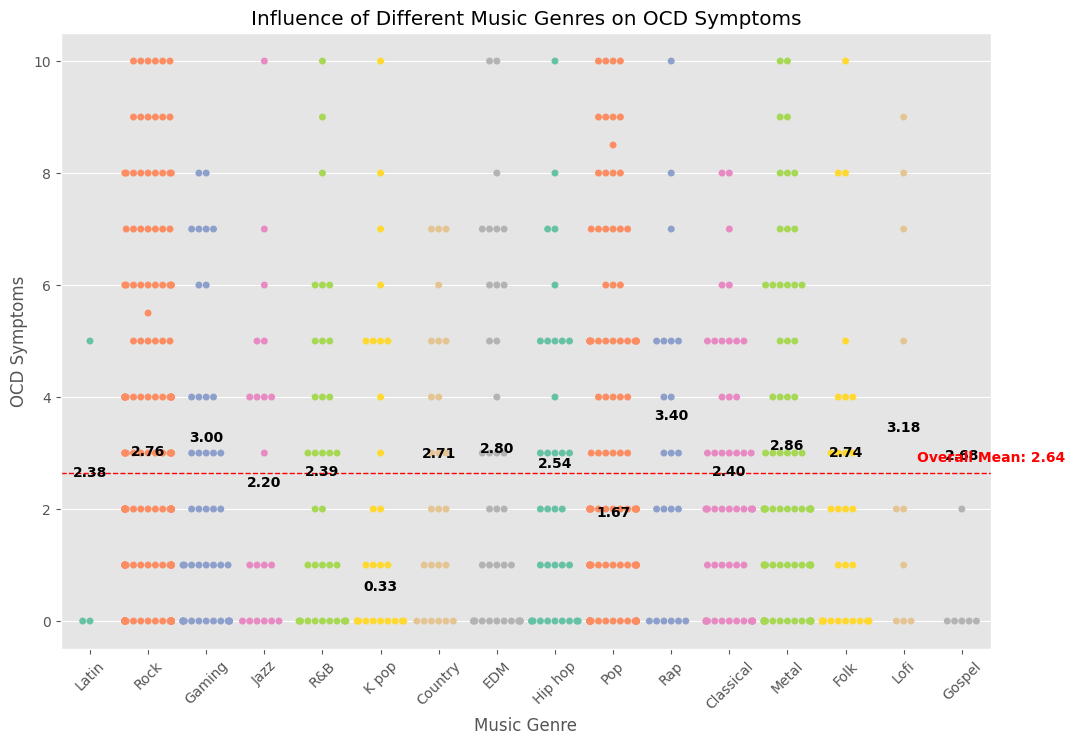

Explanation of Results:

For OCD symptoms, Gospel is associated with the lowest average score of 0.33, while Lofi has the highest average score of 3.40.


In [6]:
mean_ocd = df.groupby('Fav genre')['OCD'].mean().reset_index()

# Plot the results
plt.figure(figsize=(12,8))
sns.swarmplot(data=df, x='Fav genre', y='OCD', palette='Set2')

# Annotate mean OCD scores
for index, row in mean_ocd.iterrows():
    plt.text(index, row['OCD'] + 0.2, f'{row["OCD"]:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

# Calculate the overall average mean score
overall_mean_ocd = data['OCD'].mean()
plt.axhline(overall_mean_ocd, color='red', linestyle='--', linewidth=1)
plt.text(len(mean_ocd) - 0.5, overall_mean_ocd + 0.2, f'Overall Mean: {overall_mean_ocd:.2f}', horizontalalignment='center', size='medium', color='red', weight='semibold')

plt.title('Influence of Different Music Genres on OCD Symptoms')
plt.xlabel('Music Genre')
plt.ylabel('OCD Symptoms')
plt.xticks(rotation=45)
plt.show()

print("Explanation of Results:\n")

# Specific genre impact explanation
def explain_genre_impact(df, condition):
    mean_scores = df.groupby('Fav genre')[condition].mean()
    genre_impact = mean_scores.idxmin(), mean_scores.min(), mean_scores.idxmax(), mean_scores.max()
    return genre_impact

# OCD Explanation
min_genre, min_score, max_genre, max_score = explain_genre_impact(df, 'OCD')
print(f"For OCD symptoms, {min_genre} is associated with the lowest average score of {min_score:.2f}, while {max_genre} has the highest average score of {max_score:.2f}.")

**Project 4 Result Analysis:**

The swarm plot depicted individual data points of OCD symptoms for each music genre.

Certain genres like pop or classical music might cluster around lower levels of OCD symptoms, with fewer outliers indicating higher severity.

In contrast, genres like metal or hip-hop might have a wider spread of OCD symptom severity, suggesting a potential link between music preferences and OCD symptomatology.


**Project 5: Comparative Analysis of Music Genres on Mental Health Outcomes**

This is a comparative analysis to see how music genres impact multiple mental health outcomes simultaneously.

Steps incldue:
1. Exploratory Data Analysis (EDA).
2. Comparative Analysis.
3. Visualization of Results.
4. Conclusion: Summary and Recommendations.

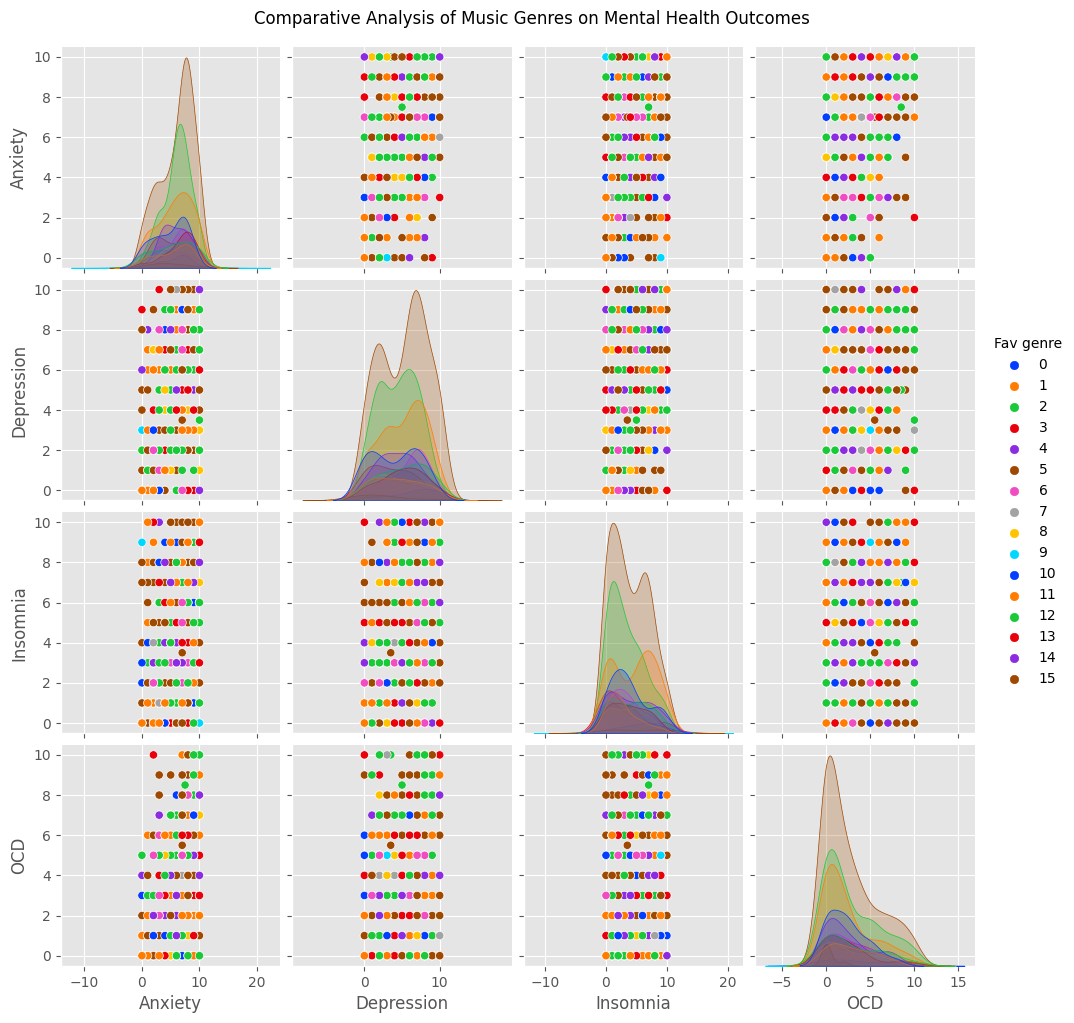

In [7]:
# Select relevant columns for the pair plot
subset_data = df[['Fav genre', 'Anxiety', 'Depression', 'Insomnia', 'OCD']]

# Convert categorical data to numerical for the pair plot
subset_data['Fav genre'] = subset_data['Fav genre'].astype('category').cat.codes

# Plot the pair plot
sns.pairplot(subset_data, hue='Fav genre', palette='bright')
plt.suptitle('Comparative Analysis of Music Genres on Mental Health Outcomes', y=1.02)
plt.show()

**Project 5 Result Analysis:**

The pair plot explored correlations between anxiety, depression, insomnia, and OCD symptoms across music genres.

It revealed potential patterns such as genres associated with lower anxiety levels also correlating with lower depression levels.

Conversely, genres linked to higher depression levels might also show higher levels of insomnia or OCD symptoms. This comprehensive view helps in understanding how music genre preferences may collectively influence various aspects of mental health.


**Conclusions**

In this portfolio, I used various visualization techniques to explore how different music genres affect various mental health outcomes:

1. Bar Plot: Analyzing the effect of different music genres on anxiety levels.
2. Box Plot: Evaluating the impact of music genres on depression.
3. Violin Plot: Investigating the impact of music genres on insomnia.
4. Swarm Plot: Assessing the influence of music genres on OCD symptoms.
5. Pair Plot: Comparative analysis of music genres on multiple mental health outcomes.

Each project's visualizations and data analyses suggest that different music genres can indeed influence various mental health conditions differently. Preferences for specific genres may correlate with higher or lower levels of anxiety, depression, insomnia, and OCD symptoms among listeners. These insights can be valuable for understanding the potential therapeutic or detrimental effects of music on mental well-being 

Overall, this was a fun profolio demonstrating the potential of data analysis in evaluating and understanding the intricate relationships between music preferences and mental health conditions. Let’s connect to discuss these projects in more detail or explore potential collaborations in the field of music, mental health and data analysis!